In [1]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import GridSearchCV

from sklearn.preprocessing import MinMaxScaler,StandardScaler

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np

from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, roc_curve

import warnings
warnings.filterwarnings('ignore')

## A. Decision Tree

### 1. Problem statement

In [ ]:
target column = 'Selector' - categorical
input columns = Age,Gender,	TB,	DB,	Alkphos,Sgpt,Sgot,TP,ALB,A/G, Ratio	

### 2. Data Gathering

In [2]:
df = pd.read_csv("Liver.csv")
df

,Age,Gender,TB,DB,Alkphos,Sgpt,Sgot,TP,ALB,A/G Ratio,Selector
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1
...,...,...,...,...,...,...,...,...,...,...,...
578,60,Male,0.5,0.1,500,20,34,5.9,1.6,0.37,2
579,40,Male,0.6,0.1,98,35,31,6.0,3.2,1.10,1
580,52,Male,0.8,0.2,245,48,49,6.4,3.2,1.00,1
581,31,Male,1.3,0.5,184,29,32,6.8,3.4,1.00,1


### 3. EDA 

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583 entries, 0 to 582
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Age        583 non-null    int64  
 1   Gender     583 non-null    object 
 2   TB         583 non-null    float64
 3   DB         583 non-null    float64
 4   Alkphos    583 non-null    int64  
 5   Sgpt       583 non-null    int64  
 6   Sgot       583 non-null    int64  
 7   TP         583 non-null    float64
 8   ALB        583 non-null    float64
 9   A/G Ratio  579 non-null    float64
 10  Selector   583 non-null    int64  
dtypes: float64(5), int64(5), object(1)
memory usage: 50.2+ KB


In [5]:
df['Selector'].value_counts()

Selector
1    416
2    167
Name: count, dtype: int64

### 4. Feature Engineering

#### 4.1 checking null values

In [3]:
df.isna().sum()

Age          0
Gender       0
TB           0
DB           0
Alkphos      0
Sgpt         0
Sgot         0
TP           0
ALB          0
A/G Ratio    4
Selector     0
dtype: int64

In [4]:
df['A/G Ratio'].replace(np.nan, df['A/G Ratio'].mean(), inplace=True)

In [5]:
df.isna().sum()

Age          0
Gender       0
TB           0
DB           0
Alkphos      0
Sgpt         0
Sgot         0
TP           0
ALB          0
A/G Ratio    0
Selector     0
dtype: int64

#### 4.2 categorical to continous

In [11]:
df['Gender'].value_counts().to_dict()

{'Male': 441, 'Female': 142}

In [6]:
df.replace({'Male': 1, 'Female': 0},inplace=True)
df.head()

,Age,Gender,TB,DB,Alkphos,Sgpt,Sgot,TP,ALB,A/G Ratio,Selector
0,65,0,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,1,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,1,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,1,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,1,3.9,2.0,195,27,59,7.3,2.4,0.40,1


#### 4.3 Outliers

<Axes: xlabel='Age'>

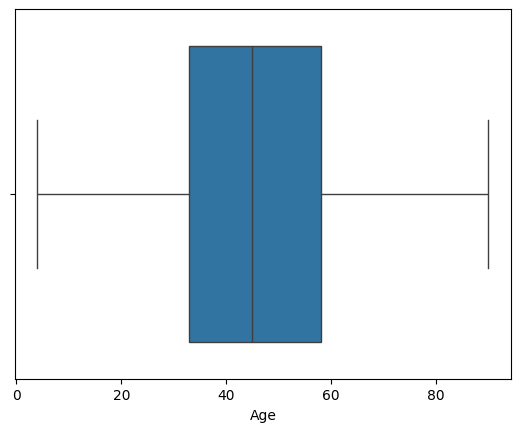

In [13]:
sns.boxplot(x=df['Age'])

<Axes: xlabel='TB'>

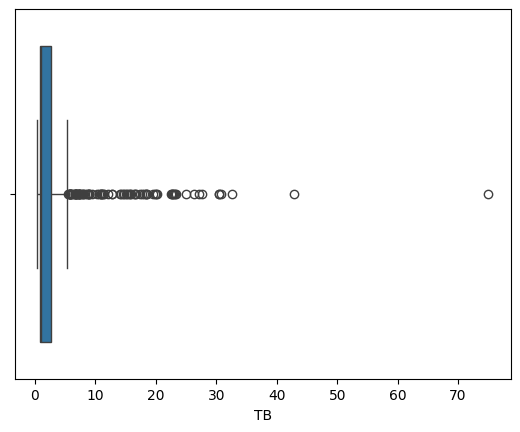

In [14]:
sns.boxplot(x=df['TB'])

<Axes: xlabel='DB'>

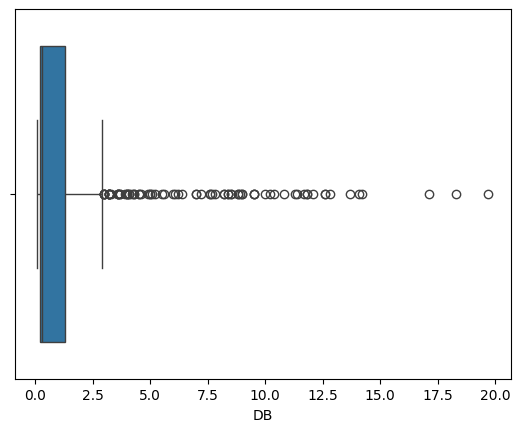

In [15]:
sns.boxplot(x=df['DB'])

<Axes: xlabel='Alkphos'>

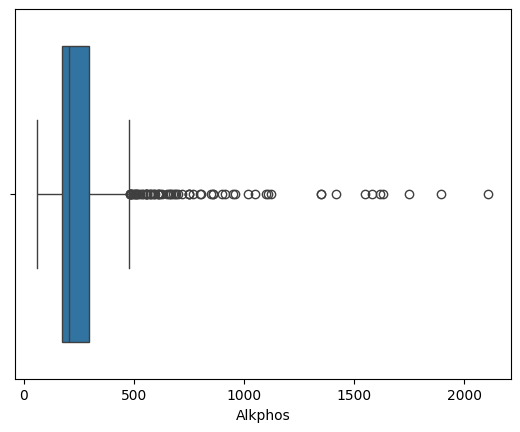

In [16]:
sns.boxplot(x=df['Alkphos'])

<Axes: xlabel='Sgpt'>

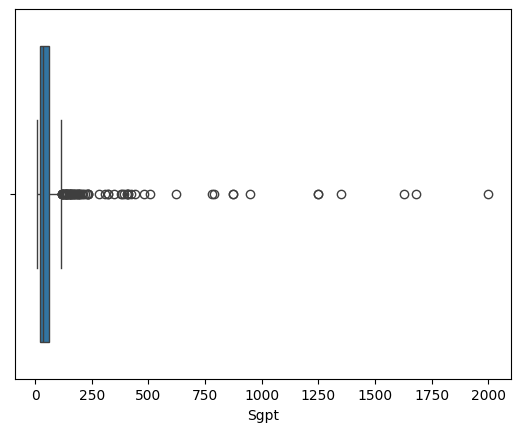

In [17]:
sns.boxplot(x=df['Sgpt'])

<Axes: xlabel='Sgot'>

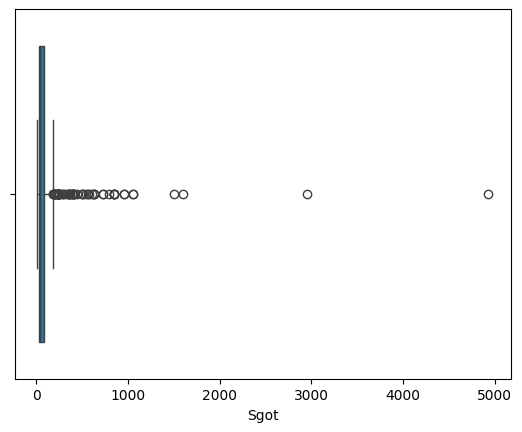

In [18]:
sns.boxplot(x=df['Sgot'])

<Axes: xlabel='TP'>

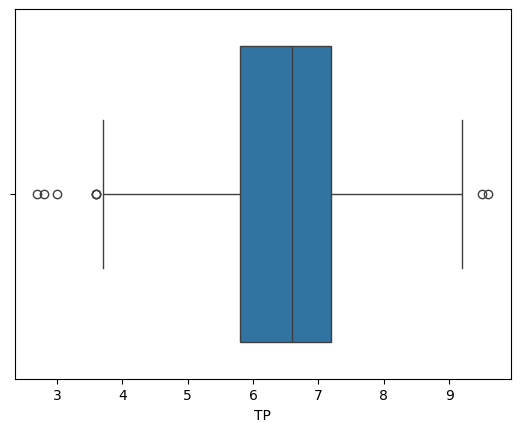

In [19]:
sns.boxplot(x=df['TP'])

<Axes: xlabel='ALB'>

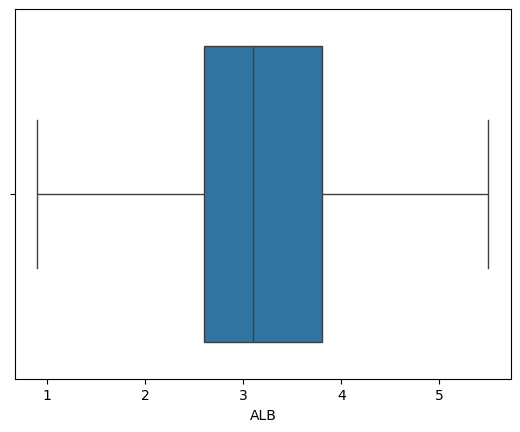

In [20]:
sns.boxplot(x=df['ALB'])

<Axes: xlabel='TP'>

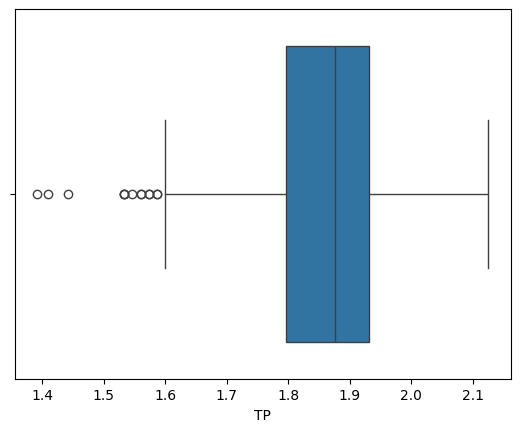

In [27]:
sns.boxplot(x=np.cbrt(df['TP']))

In [28]:
df.columns

Index(['Age', 'Gender', 'TB', 'DB', 'Alkphos', 'Sgpt', 'Sgot', 'TP', 'ALB',
       'A/G Ratio', 'Selector'],
      dtype='object')

In [29]:
from sklearn.preprocessing import PowerTransformer

In [30]:
power_trans = PowerTransformer(method='box-cox', standardize=False)
df['TB'] = power_trans.fit_transform(df[['TB']])[:,0]

In [31]:
df['DB'] = power_trans.fit_transform(df[['DB']])[:,0]

In [32]:
df['Alkphos'] = power_trans.fit_transform(df[['Alkphos']])[:,0]

In [33]:
df['Sgpt'] = power_trans.fit_transform(df[['Sgpt']])[:,0]

In [34]:
df['Sgot'] = power_trans.fit_transform(df[['Sgot']])[:,0]

In [35]:
df['TP'] = power_trans.fit_transform(df[['TP']])[:,0]

In [36]:
df['A/G Ratio'] = power_trans.fit_transform(df[['A/G Ratio']])[:,0]

In [ ]:
Outliers removed

### 5. Model Training

In [7]:
x = df.drop('Selector',axis=1)
y = df['Selector']
x_train_act,x_test_act,y_train_act,y_test_act = train_test_split(x,y,test_size=0.3,stratify=y, random_state=1)

In [8]:
dt_clf = DecisionTreeClassifier(min_samples_split=6)
dt_clf.fit(x_train_act,y_train_act)

DecisionTreeClassifier(min_samples_split=6)

### 6. Model Evaluation

In [39]:
y_train_pred = dt_clf.predict(x_train_act)
y_test_pred = dt_clf.predict(x_test_act)

train_acc = accuracy_score(y_train_pred,y_train_act)
test_acc = accuracy_score(y_test_pred,y_test_act)
print("train accuracy:",train_acc)
print("test accuracy:",test_acc)

train accuracy: 0.946078431372549
test accuracy: 0.7028571428571428


In [40]:
#train eval
y_train_pred = dt_clf.predict(x_train_act)
cnf_matrix = confusion_matrix(y_train_pred,y_train_act)
accuracy = accuracy_score(y_train_pred,y_train_act)
clf_report = classification_report(y_train_pred,y_train_act)
print("Confusion Matrix:\n",cnf_matrix,end='\n\n')
print("Accuracy :",accuracy,end='\n\n')
print('Classification report :\n',clf_report)

Confusion Matrix:
 [[282  13]
 [  9 104]]

Accuracy : 0.946078431372549

Classification report :
               precision    recall  f1-score   support

           1       0.97      0.96      0.96       295
           2       0.89      0.92      0.90       113

    accuracy                           0.95       408
   macro avg       0.93      0.94      0.93       408
weighted avg       0.95      0.95      0.95       408



In [41]:
#test eval
y_test_pred = dt_clf.predict(x_test_act)
cnf_matrix = confusion_matrix(y_test_pred,y_test_act)
accuracy = accuracy_score(y_test_pred,y_test_act)
clf_report = classification_report(y_test_pred,y_test_act)
print("Confusion Matrix:\n",cnf_matrix,end='\n\n')
print("Accuracy :",accuracy,end='\n\n')
print('Classification report :\n',clf_report)

Confusion Matrix:
 [[100  27]
 [ 25  23]]

Accuracy : 0.7028571428571428

Classification report :
               precision    recall  f1-score   support

           1       0.80      0.79      0.79       127
           2       0.46      0.48      0.47        48

    accuracy                           0.70       175
   macro avg       0.63      0.63      0.63       175
weighted avg       0.71      0.70      0.70       175



### 7. feature selection

In [42]:
dt_clf.feature_importances_

array([0.15996818, 0.01518458, 0.05180034, 0.06860686, 0.15393439,
       0.31547966, 0.05720615, 0.05880618, 0.04812716, 0.0708865 ])

### 8. Hyperparameter Tuning

In [46]:
dt_model = DecisionTreeClassifier(random_state=2)

hyp_grid = {
            "criterion" :['gini','entropy'],
            "max_depth" : np.arange(3,10),
            "min_samples_split" : range(5,12),
            "min_samples_leaf" : range(3,15)}

gscv_dt_model = GridSearchCV(dt_model, param_grid = hyp_grid, cv=7, n_jobs=-1)
gscv_dt_model.fit(x_train_act, y_train_act)   

GridSearchCV(cv=7, estimator=DecisionTreeClassifier(random_state=2), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': array([3, 4, 5, 6, 7, 8, 9]),
                         'min_samples_leaf': range(3, 15),
                         'min_samples_split': range(5, 12)})

In [48]:
gscv_dt_model.best_estimator_

DecisionTreeClassifier(max_depth=5, min_samples_leaf=10, min_samples_split=5,
                       random_state=2)

In [49]:
dt_clf = gscv_dt_model.best_estimator_
dt_clf.fit(x_train_act,y_train_act)
print("train:",dt_clf.score(x_train_act,y_train_act))
print("test:",dt_clf.score(x_test_act,y_test_act))

train: 0.7720588235294118
test: 0.64


## B. knn

#### B.1 without standardization

#### 1. Model Training

In [56]:
knn_clf = KNeighborsClassifier(n_neighbors=3,p=2)   # manually tested - best value at n_neighbors=3
knn_clf.fit(x_train_act,y_train_act)

KNeighborsClassifier(n_neighbors=3)

#### 2. Model Evaluation

In [57]:
y_train_pred = knn_clf.predict(x_train_act)
y_test_pred = knn_clf.predict(x_test_act)

train_acc = accuracy_score(y_train_pred,y_train_act)
test_acc = accuracy_score(y_test_pred,y_test_act)
print("train accuracy:",train_acc)
print("test accuracy:",test_acc)

train accuracy: 0.8583690987124464
test accuracy: 0.7094017094017094


In [58]:
y_train_pred = knn_clf.predict(x_train_act)           # train eval
cnf_matrix = confusion_matrix(y_train_act, y_train_pred)
accuracy = accuracy_score(y_train_act, y_train_pred)
clf_report = classification_report(y_train_act, y_train_pred)
print("Confusion Matrix :\n",cnf_matrix,end='\n\n')
print("Accuracy :", accuracy,end='\n\n')
print("Classification Report :\n", clf_report)

Confusion Matrix :
 [[300  33]
 [ 33 100]]

Accuracy : 0.8583690987124464

Classification Report :
               precision    recall  f1-score   support

           1       0.90      0.90      0.90       333
           2       0.75      0.75      0.75       133

    accuracy                           0.86       466
   macro avg       0.83      0.83      0.83       466
weighted avg       0.86      0.86      0.86       466



In [59]:
y_test_pred = knn_clf.predict(x_test_act)                 # test eval
cnf_matrix = confusion_matrix(y_test_act, y_test_pred)
accuracy = accuracy_score(y_test_act, y_test_pred)
clf_report = classification_report(y_test_act, y_test_pred)

print("Confusion Matrix :\n",cnf_matrix,end='\n\n')
print("Accuracy :", accuracy,end='\n\n')
print("Classification Report :\n", clf_report)

Confusion Matrix :
 [[70 13]
 [21 13]]

Accuracy : 0.7094017094017094

Classification Report :
               precision    recall  f1-score   support

           1       0.77      0.84      0.80        83
           2       0.50      0.38      0.43        34

    accuracy                           0.71       117
   macro avg       0.63      0.61      0.62       117
weighted avg       0.69      0.71      0.70       117



#### 3. Best p,k values

Text(0, 0.5, 'Accuracy')

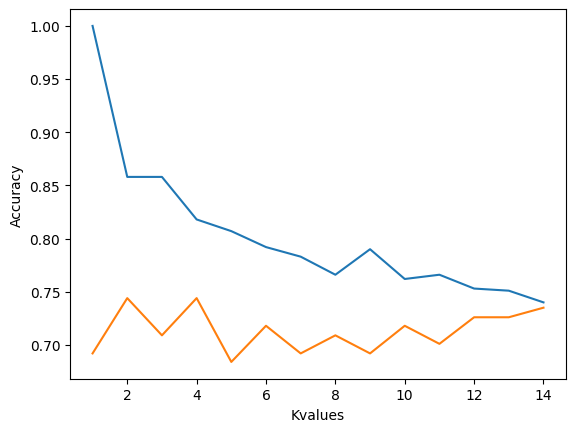

In [60]:
k_values = np.arange(1,15)     
train_acc_list = []
test_acc_list = []
for k in k_values:
    knn_clf = KNeighborsClassifier(n_neighbors=k, p = 2)
    knn_clf.fit(x_train_act, y_train_act)
    train_acc_list.append(np.around(knn_clf.score(x_train_act, y_train_act),3))
    test_acc_list.append(np.around(knn_clf.score(x_test_act, y_test_act),3))

plt.plot(k_values, train_acc_list)   
plt.plot(k_values, test_acc_list)

plt.xlabel("Kvalues")
plt.ylabel("Accuracy")    

Text(0, 0.5, 'Accuracy')

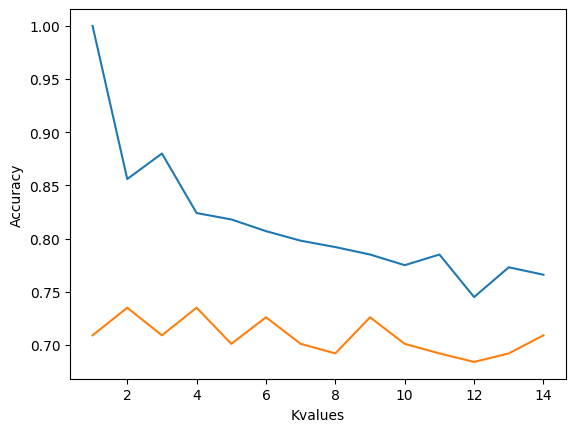

In [61]:
k_values = np.arange(1,15)           # p=1
train_acc_list = []
test_acc_list = []
for k in k_values:
    knn_clf = KNeighborsClassifier(n_neighbors=k, p = 1)
    knn_clf.fit(x_train_act, y_train_act)
    train_acc_list.append(np.around(knn_clf.score(x_train_act, y_train_act),3))
    test_acc_list.append(np.around(knn_clf.score(x_test_act, y_test_act),3))

plt.plot(k_values, train_acc_list)   
plt.plot(k_values, test_acc_list)

plt.xlabel("Kvalues")
plt.ylabel("Accuracy")    

In [ ]:
best value : k=9, p=1

In [62]:
knn_clf = KNeighborsClassifier(n_neighbors=9,p=1)   
knn_clf.fit(x_train_act,y_train_act)

KNeighborsClassifier(n_neighbors=9, p=1)

In [63]:
y_train_pred = knn_clf.predict(x_train_act)
y_test_pred = knn_clf.predict(x_test_act)

train_acc = accuracy_score(y_train_pred,y_train_act)
test_acc = accuracy_score(y_test_pred,y_test_act)
print("train accuracy:",train_acc)
print("test accuracy:",test_acc)

train accuracy: 0.7854077253218884
test accuracy: 0.7264957264957265


#### B.2 with standardization

In [64]:
x = df.drop('Selector',axis=1)
y = df['Selector']

std_scaler = StandardScaler()
df_x = std_scaler.fit_transform(x)
df_x.shape   

(583, 10)

In [65]:
x_train_act, x_test_act, y_train_act, y_test_act = train_test_split(df_x,y, random_state=0, test_size=0.2, stratify=y)

In [66]:
knn_clf = KNeighborsClassifier(n_neighbors=4,p=2)         
knn_clf.fit(x_train_act,y_train_act)

KNeighborsClassifier(n_neighbors=4)

In [67]:
y_train_pred = knn_clf.predict(x_train_act)
y_test_pred = knn_clf.predict(x_test_act)

train_acc = accuracy_score(y_train_pred,y_train_act)
test_acc = accuracy_score(y_test_pred,y_test_act)
print("train accuracy:",train_acc)
print("test accuracy:",test_acc)

train accuracy: 0.8175965665236051
test accuracy: 0.7435897435897436


#### Best p,k value

Text(0, 0.5, 'Accuracy')

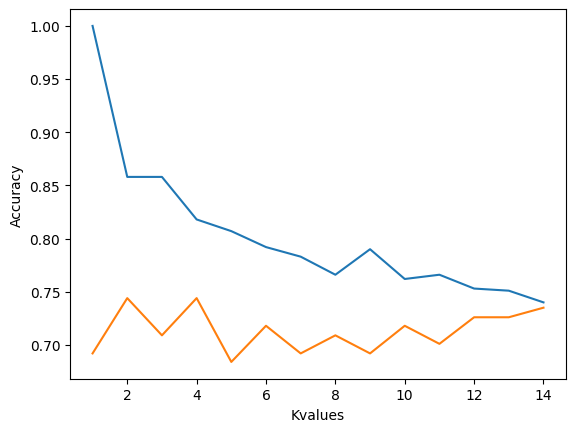

In [68]:
k_values = np.arange(1,15)     
train_acc_list = []
test_acc_list = []
for k in k_values:
    knn_clf = KNeighborsClassifier(n_neighbors=k, p = 2)
    knn_clf.fit(x_train_act, y_train_act)
    train_acc_list.append(np.around(knn_clf.score(x_train_act, y_train_act),3))
    test_acc_list.append(np.around(knn_clf.score(x_test_act, y_test_act),3))

plt.plot(k_values, train_acc_list)   
plt.plot(k_values, test_acc_list)

plt.xlabel("Kvalues")
plt.ylabel("Accuracy")    

Text(0, 0.5, 'Accuracy')

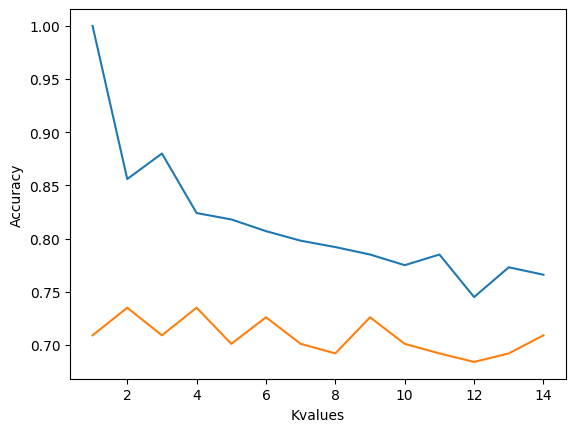

In [69]:
k_values = np.arange(1,15)           # p=1
train_acc_list = []
test_acc_list = []
for k in k_values:
    knn_clf = KNeighborsClassifier(n_neighbors=k, p = 1)
    knn_clf.fit(x_train_act, y_train_act)
    train_acc_list.append(np.around(knn_clf.score(x_train_act, y_train_act),3))
    test_acc_list.append(np.around(knn_clf.score(x_test_act, y_test_act),3))

plt.plot(k_values, train_acc_list)   
plt.plot(k_values, test_acc_list)

plt.xlabel("Kvalues")
plt.ylabel("Accuracy")    

In [ ]:
Best values : k=6, p=2

In [70]:
knn_clf = KNeighborsClassifier(n_neighbors=6,p=2)   
knn_clf.fit(x_train_act,y_train_act)

y_train_pred = knn_clf.predict(x_train_act)
y_test_pred = knn_clf.predict(x_test_act)

train_acc = accuracy_score(y_train_pred,y_train_act)
test_acc = accuracy_score(y_test_pred,y_test_act)
print("train accuracy:",train_acc)
print("test accuracy:",test_acc)

train accuracy: 0.7918454935622318
test accuracy: 0.717948717948718


## C. Random Forest

#### 1. Model Train

In [78]:
rf_clf = RandomForestClassifier(random_state=1)
rf_clf.fit(x_train_act, y_train_act)

RandomForestClassifier(random_state=1)

#### 2. Evaluation

In [79]:
y_train_pred = rf_clf.predict(x_train_act)
y_test_pred = rf_clf.predict(x_test_act)

train_acc = accuracy_score(y_train_pred,y_train_act)
test_acc = accuracy_score(y_test_pred,y_test_act)
print("train accuracy:",train_acc)
print("test accuracy:",test_acc)

train accuracy: 1.0
test accuracy: 0.7094017094017094


In [80]:
# Training Data Evaluation
y_train_pred = rf_clf.predict(x_train_act)
cnf_matrix = confusion_matrix(y_train_act, y_train_pred)
accuracy = accuracy_score(y_train_act, y_train_pred)
clf_report = classification_report(y_train_act, y_train_pred)

print("Confusion Matrix:\n",cnf_matrix,end='\n\n')
print("Accuracy :",accuracy,end='\n\n')
print('Classification report :\n',clf_report)

Confusion Matrix:
 [[333   0]
 [  0 133]]

Accuracy : 1.0

Classification report :
               precision    recall  f1-score   support

           1       1.00      1.00      1.00       333
           2       1.00      1.00      1.00       133

    accuracy                           1.00       466
   macro avg       1.00      1.00      1.00       466
weighted avg       1.00      1.00      1.00       466



In [81]:
# Test Data Evaluation
y_test_pred = rf_clf.predict(x_test_act)
cnf_matrix = confusion_matrix(y_test_act, y_test_pred)
accuracy = accuracy_score(y_test_act, y_test_pred)
clf_report = classification_report(y_test_act, y_test_pred)

print("Confusion Matrix:\n",cnf_matrix,end='\n\n')
print("Accuracy :",accuracy,end='\n\n')
print('Classification report :\n',clf_report)

Confusion Matrix:
 [[75  8]
 [26  8]]

Accuracy : 0.7094017094017094

Classification report :
               precision    recall  f1-score   support

           1       0.74      0.90      0.82        83
           2       0.50      0.24      0.32        34

    accuracy                           0.71       117
   macro avg       0.62      0.57      0.57       117
weighted avg       0.67      0.71      0.67       117



#### 3. Hyperpara Tuning

In [82]:
rf_model = RandomForestClassifier(random_state=1, n_jobs = -1)

hyp_grid = {"n_estimators":np.arange(10,80,10),
            "criterion" : ['gini','entropy'],
            "max_depth" : np.arange(5,10,2),
            "min_samples_split" : range(8,16,2),
            "min_samples_leaf" : range(4,8,2)}

gscv_rf_model = GridSearchCV(rf_model,param_grid = hyp_grid, cv = 7,n_jobs  = -1)
gscv_rf_model.fit(x_train_act, y_train_act)

GridSearchCV(cv=7, estimator=RandomForestClassifier(n_jobs=-1, random_state=1),
             n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': array([5, 7, 9]),
                         'min_samples_leaf': range(4, 8, 2),
                         'min_samples_split': range(8, 16, 2),
                         'n_estimators': array([10, 20, 30, 40, 50, 60, 70])})

In [83]:
gscv_rf_model.best_estimator_

RandomForestClassifier(criterion='entropy', max_depth=9, min_samples_leaf=4,
                       min_samples_split=14, n_estimators=10, n_jobs=-1,
                       random_state=1)

In [84]:
rf_clf = gscv_rf_model.best_estimator_
rf_clf.fit(x_train_act,y_train_act)
print('Train Accuracy :',rf_clf.score(x_train_act, y_train_act))
print("Test Accuracy  :",rf_clf.score(x_test_act, y_test_act))

Train Accuracy : 0.8540772532188842
Test Accuracy  : 0.7008547008547008


In [85]:
# Training Data Evaluation
y_train_pred = rf_clf.predict(x_train_act)
cnf_matrix = confusion_matrix(y_train_act, y_train_pred)
accuracy = accuracy_score(y_train_act, y_train_pred)
clf_report = classification_report(y_train_act, y_train_pred)

print("Confusion Matrix:\n",cnf_matrix,end='\n\n')
print("Accuracy :",accuracy,end='\n\n')
print('Classification report :\n',clf_report)

Confusion Matrix:
 [[322  11]
 [ 57  76]]

Accuracy : 0.8540772532188842

Classification report :
               precision    recall  f1-score   support

           1       0.85      0.97      0.90       333
           2       0.87      0.57      0.69       133

    accuracy                           0.85       466
   macro avg       0.86      0.77      0.80       466
weighted avg       0.86      0.85      0.84       466



In [86]:
# Test Data Evaluation
y_test_pred = rf_clf.predict(x_test_act)
cnf_matrix = confusion_matrix(y_test_act, y_test_pred)
accuracy = accuracy_score(y_test_act, y_test_pred)
clf_report = classification_report(y_test_act, y_test_pred)

print("Confusion Matrix:\n",cnf_matrix,end='\n\n')
print("Accuracy :",accuracy,end='\n\n')
print('Classification report :\n',clf_report)

Confusion Matrix:
 [[76  7]
 [28  6]]

Accuracy : 0.7008547008547008

Classification report :
               precision    recall  f1-score   support

           1       0.73      0.92      0.81        83
           2       0.46      0.18      0.26        34

    accuracy                           0.70       117
   macro avg       0.60      0.55      0.53       117
weighted avg       0.65      0.70      0.65       117



## D. Adaboost

#### 1. Model Training

In [88]:
adb_clf = AdaBoostClassifier()   
adb_clf.fit(x_train_act,y_train_act)

AdaBoostClassifier()

#### 2. Model Evaluation

In [89]:
y_train_pred = adb_clf.predict(x_train_act)
y_test_pred = adb_clf.predict(x_test_act)

train_acc = accuracy_score(y_train_pred,y_train_act)
test_acc = accuracy_score(y_test_pred,y_test_act)
print("train accuracy:",train_acc)
print("test accuracy:",test_acc)

train accuracy: 0.8390557939914163
test accuracy: 0.7521367521367521


In [90]:
# Train Eval
y_train_pred = adb_clf.predict(x_train_act)
cnf_matrix = confusion_matrix(y_train_act, y_train_pred)    
accuracy = accuracy_score(y_train_act, y_train_pred)
clf_report = classification_report(y_train_act, y_train_pred)

print("Confusion Matrix :\n", cnf_matrix, end='\n\n')
print('Accuracy :', accuracy, end='\n\n')
print("Classification Report :\n", clf_report)

Confusion Matrix :
 [[310  23]
 [ 52  81]]

Accuracy : 0.8390557939914163

Classification Report :
               precision    recall  f1-score   support

           1       0.86      0.93      0.89       333
           2       0.78      0.61      0.68       133

    accuracy                           0.84       466
   macro avg       0.82      0.77      0.79       466
weighted avg       0.83      0.84      0.83       466



In [91]:
# Test Eval
y_test_pred = adb_clf.predict(x_test_act)
cnf_matrix = confusion_matrix(y_test_act, y_test_pred)    
accuracy = accuracy_score(y_test_act, y_test_pred)
clf_report = classification_report(y_test_act, y_test_pred)

print("Confusion Matrix :\n", cnf_matrix, end='\n\n')
print('Accuracy :', accuracy, end='\n\n')
print("Classification Report :\n", clf_report)

Confusion Matrix :
 [[73 10]
 [19 15]]

Accuracy : 0.7521367521367521

Classification Report :
               precision    recall  f1-score   support

           1       0.79      0.88      0.83        83
           2       0.60      0.44      0.51        34

    accuracy                           0.75       117
   macro avg       0.70      0.66      0.67       117
weighted avg       0.74      0.75      0.74       117



#### 3. Hyperparameter Tuning

In [93]:
adb_clf = AdaBoostClassifier(random_state=23)
hyp_grid = {'n_estimators':range(10,100,10),
            'learning_rate':np.arange(0,1,0.1)}
adb_gscv_model = GridSearchCV(adb_clf, param_grid=hyp_grid, cv=3)
adb_gscv_model.fit(x_train_act, y_train_act)

GridSearchCV(cv=3, estimator=AdaBoostClassifier(random_state=23),
             param_grid={'learning_rate': array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]),
                         'n_estimators': range(10, 100, 10)})

In [94]:
adb_gscv_model.best_estimator_

AdaBoostClassifier(learning_rate=0.9, n_estimators=10, random_state=23)

In [97]:
adb_clf = adb_gscv_model.best_estimator_

y_train_pred = adb_clf.predict(x_train_act)
y_test_pred = adb_clf.predict(x_test_act)

train_acc = accuracy_score(y_train_pred,y_train_act)
test_acc = accuracy_score(y_test_pred,y_test_act)
print("train accuracy:",train_acc)
print("test accuracy:",test_acc)

train accuracy: 0.7618025751072961
test accuracy: 0.7264957264957265


In [95]:
adb_clf = adb_gscv_model.best_estimator_

y_train_pred = adb_clf.predict(x_train_act)
accuracy = accuracy_score(y_train_act, y_train_pred)
clf_report = classification_report(y_train_act, y_train_pred)

print('Accuracy :', accuracy, end='\n\n')
print("Classification Report :\n", clf_report)

Accuracy : 0.7618025751072961

Classification Report :
               precision    recall  f1-score   support

           1       0.76      0.96      0.85       333
           2       0.74      0.26      0.38       133

    accuracy                           0.76       466
   macro avg       0.75      0.61      0.62       466
weighted avg       0.76      0.76      0.72       466



In [96]:
adb_clf = adb_gscv_model.best_estimator_

y_test_pred = adb_clf.predict(x_test_act)
accuracy = accuracy_score(y_test_act, y_test_pred)
clf_report = classification_report(y_test_act, y_test_pred)
print('Accuracy :', accuracy, end='\n\n')
print("Classification Report :\n", clf_report)

Accuracy : 0.7264957264957265

Classification Report :
               precision    recall  f1-score   support

           1       0.74      0.95      0.83        83
           2       0.60      0.18      0.27        34

    accuracy                           0.73       117
   macro avg       0.67      0.56      0.55       117
weighted avg       0.70      0.73      0.67       117



In [ ]:
Adaboost :
Before - 84  76
after -  76  73

## conclusion

In [ ]:
           Original                  after Hyp_para_tune

           Train     Test            Train     Test
knn         0.81     0.74             0.79     0.73
Dec Tree    0.94     0.70             0.77    0.65
Ran For     1        0.7              0.85     0.7
AdaBoost    0.84     0.76             .76       .73